In [60]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.likelihood import LikelihoodClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2007')

# Load data from a JSONL file
market = Market.loader('2007/03/01','2007/04/01', data_path)

100%|██████████| 46/46 [06:44<00:00,  8.79s/it]


In [11]:
period_length=1800
# Get periods of length 15
periods = market.get_periods_fast(period_length=period_length)
print(f"Number of periods: {len(periods)}")

100%|██████████| 8577796/8577796 [10:22<00:00, 13777.25it/s]


Number of periods: 351


In [94]:
population_size = {
    5*60: 4000,
    15*60: 1000,
    30*60: 800,
    60*60: 600
}

clustering = LikelihoodClustering().fit(periods, generations=10, population_size=population_size.get(period_length), num_clusters=len(periods)//10)

print('-' * 50)
clustering.summarize_clusters()
print('-' * 50)

Solving with PGA...: 100%|██████████| 10/10 [00:56<00:00,  5.64s/it]

Best solution : [30, 20, 26, 14, 11, 8, 28, 11, 6, 1, 14, 1, 26, 0, 28, 21, 15, 29, 0, 24, 31, 1, 25, 30, 1, 3, 15, 7, 19, 17, 29, 0, 20, 33, 22, 7, 21, 9, 5, 8, 11, 17, 33, 15, 9, 11, 22, 2, 18, 34, 6, 7, 9, 23, 18, 25, 22, 31, 23, 26, 17, 1, 9, 10, 3, 2, 9, 21, 12, 28, 6, 27, 12, 11, 29, 10, 31, 34, 0, 2, 18, 32, 14, 28, 31, 10, 11, 4, 34, 18, 5, 30, 22, 4, 26, 31, 30, 6, 2, 31, 7, 26, 31, 23, 0, 2, 5, 8, 5, 26, 28, 11, 8, 19, 17, 9, 14, 23, 3, 30, 24, 30, 3, 10, 8, 6, 17, 11, 21, 11, 6, 22, 31, 12, 6, 5, 24, 24, 24, 2, 18, 32, 21, 12, 13, 15, 33, 6, 22, 1, 25, 18, 29, 33, 23, 7, 20, 7, 23, 31, 10, 24, 14, 14, 7, 25, 4, 10, 29, 10, 16, 8, 10, 13, 21, 6, 16, 31, 30, 8, 10, 32, 23, 34, 20, 5, 23, 31, 8, 7, 23, 21, 28, 31, 26, 13, 23, 1, 2, 26, 26, 30, 7, 29, 11, 1, 33, 32, 20, 3, 0, 31, 20, 22, 25, 10, 6, 15, 17, 27, 28, 10, 24, 19, 12, 33, 25, 1, 15, 4, 28, 4, 34, 25, 23, 29, 27, 18, 21, 1, 1, 26, 29, 9, 15, 15, 19, 33, 1, 3, 4, 18, 3, 22, 5, 2, 1, 14, 27, 32, 2, 2, 29, 17, 18, 5, 28,

Count of periods per time:
08:00 : 20
08:30 : 20
09:00 : 21
09:30 : 21
10:00 : 21
10:30 : 21
11:00 : 21
11:30 : 21
12:00 : 21
12:30 : 21
13:00 : 21
13:30 : 21
14:00 : 21
14:30 : 21
15:00 : 21
15:30 : 21
16:00 : 16


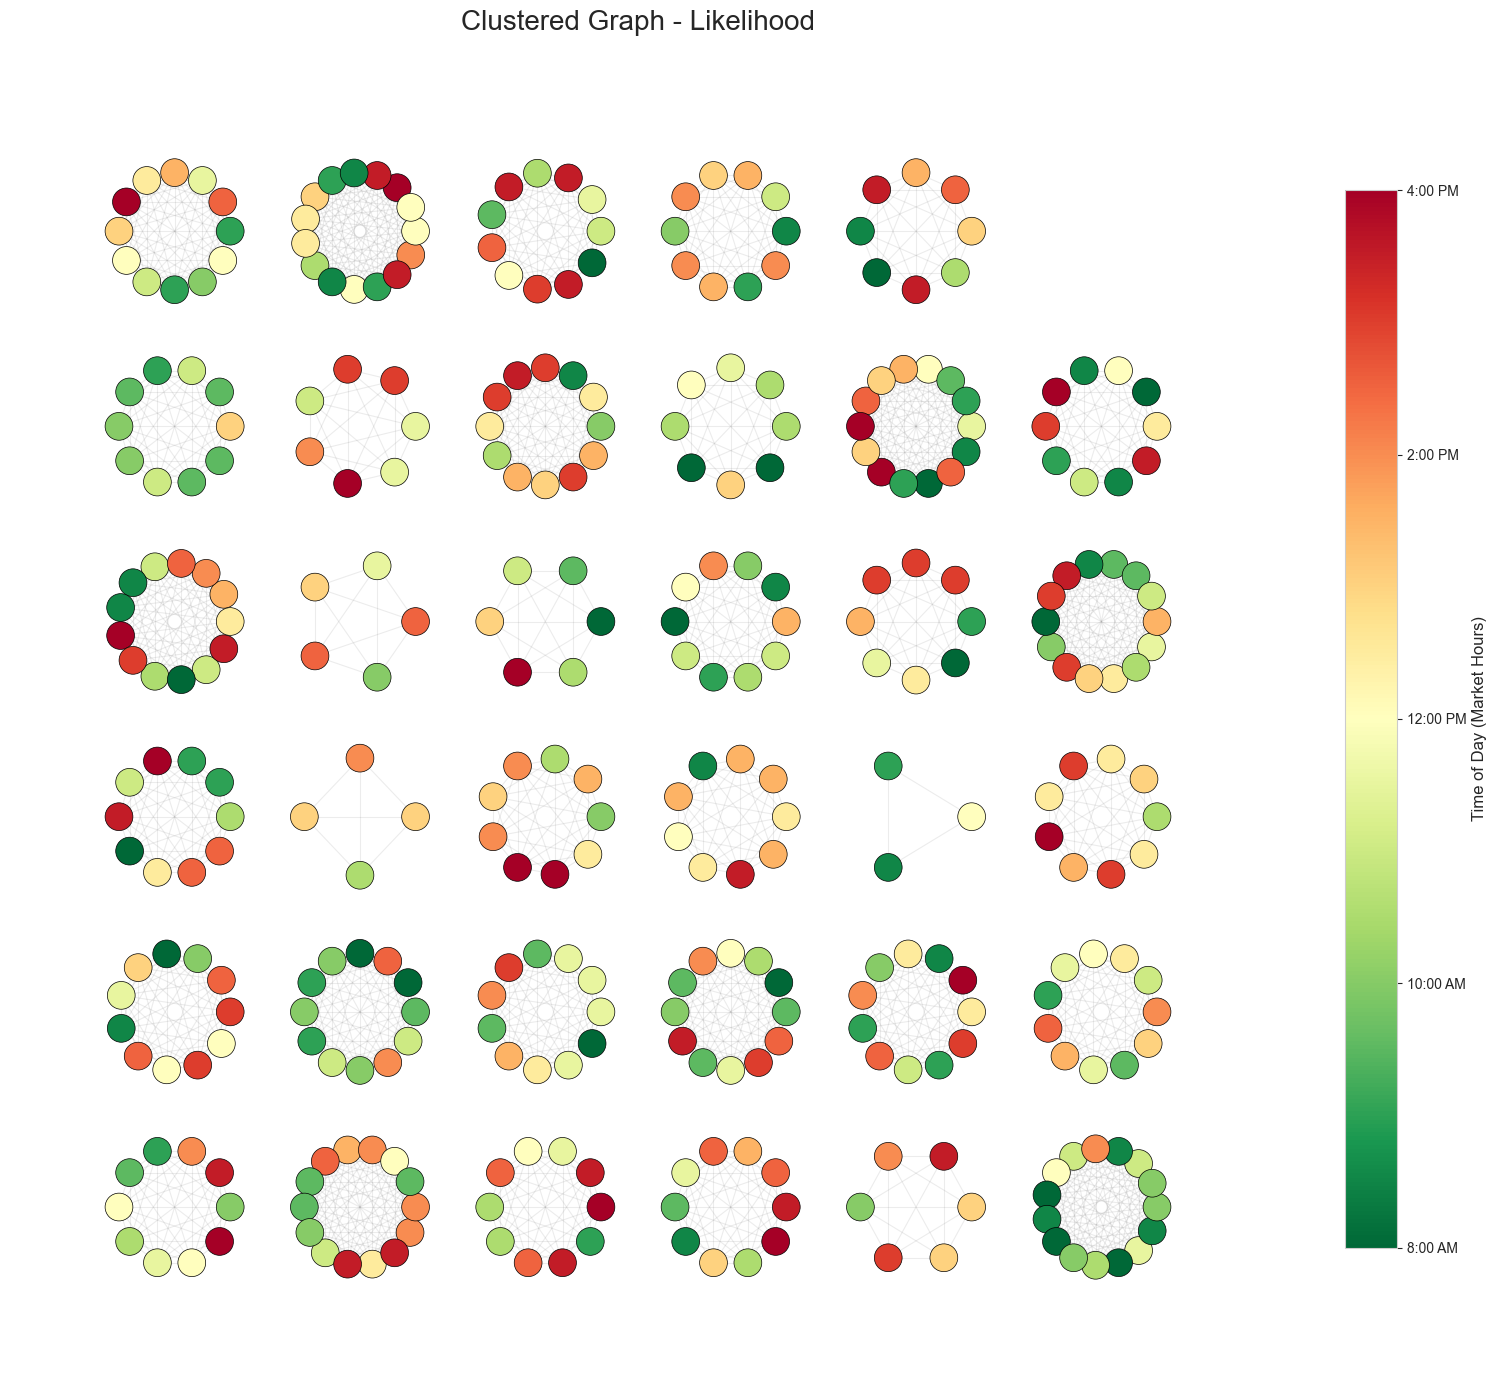

In [95]:
clustering.plot_cluster_2(method='Likelihood')

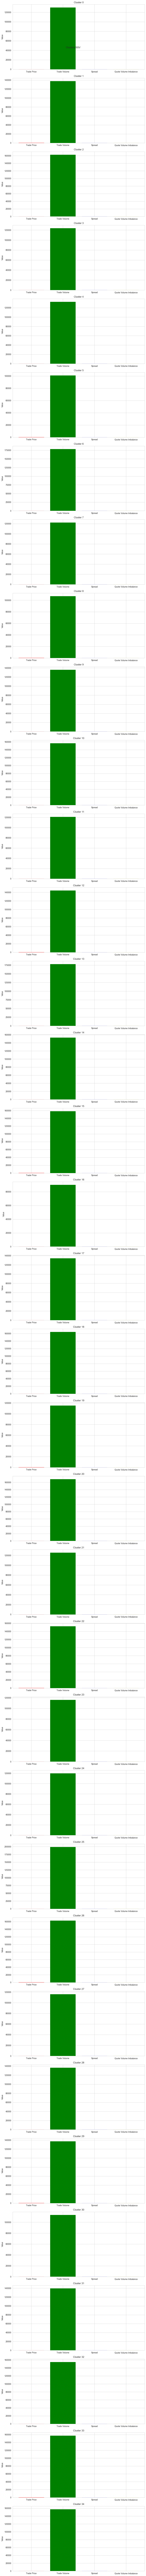

In [98]:
clustering.plot_ssv()

In [50]:
for period in periods:
    if np.isnan(period.fv).any():
        print('NAN')

In [68]:
print(clustering.n_clusters, len(clustering.labels))

35 350
